# Musk Dataset

# Importing Necessary Libraries

In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import h5py

# Reading Data and Data Preprocessing

In [18]:
# Reading csv file using pandas
data = pd.read_csv('musk_csv.csv')

In [19]:
# Showing top five row of data
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [20]:
#Check for  Null Values
data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [21]:
#Now we see number of unique values in each column of data
data.nunique()

ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
                     ... 
f163                  292
f164                  172
f165                  352
f166                  385
class                   2
Length: 170, dtype: int64

In [22]:
#Now we see the elements in class variable.
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

There is imbalance in class variable. 5581 data support class 0 and only 1017 data support class1. 
Probably it affect the model Accuracy.

Text(0, 0.5, 'Frequency')

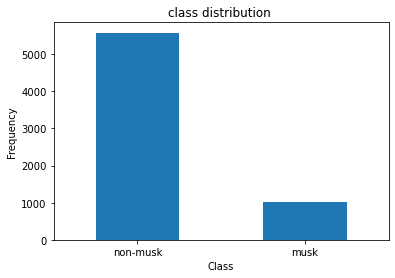

In [23]:
#plotting the dataset frequency
labels = ['non-musk', 'musk']
classes = pd.value_counts(data['class'],sort = True)
classes.plot(kind = 'bar', rot = 0)
plt.title("class distribution ")
plt.xticks(range(2), labels )
plt.xlabel("Class")
plt.ylabel("Frequency")

In [24]:
# Removing Categorical Variable
data = data.drop(['molecule_name','ID','conformation_name'],axis=1)


In [25]:
# Shuffling the Dataset to generate randomness

from sklearn.utils import shuffle

df = shuffle(data).reset_index(drop = True)
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,62,-172,27,-75,-108,184,-122,55,-158,-25,...,-268,32,9,24,82,189,-39,-122,139,0
1,30,-198,-165,140,-116,104,-157,-17,-214,-108,...,-251,-210,-115,121,87,268,-70,-258,-14,0
2,20,-198,-159,32,-117,131,49,43,-26,-117,...,-273,-201,-133,-97,-14,141,-60,-126,21,1
3,30,-144,-109,-77,-117,10,27,-95,-20,-21,...,-82,-137,-120,-30,17,602,221,-318,-461,0
4,36,-138,-144,10,-117,85,58,18,81,-121,...,-237,-161,-68,-35,99,211,-51,-158,129,0


In [26]:
# Seperating Input & Output variable
# X,y value where X containing data with no class column and y with class column of data.
 
X = df.drop('class', axis = 1)
Y = df['class']

# Converting dataframe object to numpy array

X = X.to_numpy()
Y = Y.to_numpy()

# Feature Scaling

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Principal Component Analysis(PCA)

Introducing Principal component Analysis because we have many variables. So we reduce our variable. We will convert 166 variable to the optimal components variable which equally represent the 166 variable.

In [28]:
# Finding the optimal number of features after maintaining 95% variance
pca = PCA()
pca.fit(X_scaled)

current_variance= 0
total = sum(pca.explained_variance_)
optimal_components = 0
while current_variance/total < 0.95:
    current_variance+=pca.explained_variance_[optimal_components]
    optimal_components+=1
    
optimal_components

39

We have recieved 39 as the optimal_components. So we will use this variable as our input_dim parameter when we will be building model

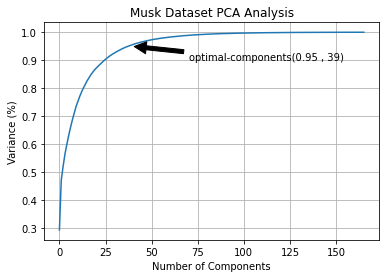

In [45]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Musk Dataset PCA Analysis')

plt.annotate('optimal-components(0.95 , 39)', xy=(39, 0.95), xytext=(70, 0.9),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.grid()

# Splitting Dataset Into Training & Testing

In [30]:
#80-20 Split Ratio is maintained

x_train, x_test, y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = 0)

In [31]:
# Transforming our x_train and x_test into pca components
pca1 = PCA(n_components=optimal_components)
x_train_pca = pca1.fit_transform(x_train)
x_test_pca = pca1.transform(x_test)

# Building Model

In [32]:
# Initialising Model
model = Sequential()

In [33]:
# Adding the inpur layer and the first Hidden Layer 
model.add(Dense(20, activation = 'relu',
                kernel_initializer = 'random_normal', input_dim = optimal_components))
# Hidden Layer 2
model.add(Dense(20, activation = 'relu',
               kernel_initializer = 'random_normal'))
# Output Layer
model.add(Dense(2, activation = 'sigmoid',
               kernel_initializer = 'random_normal'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                800       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compiling Model with Adam optimizer.
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [35]:
tensorBoard = TensorBoard(log_dir = 'logs/{}'.format(time()))

In [36]:
#Now we fit the model with X_train_pca , Y_train with  validation sets of X_test_pca, Y_test. 
history = model.fit(x_train_pca,to_categorical(y_train, num_classes = 2), epochs= 10 , batch_size = 20,
          validation_data = (x_test_pca,to_categorical(y_test, num_classes = 2)),
         callbacks = [tensorBoard])
model.metrics_names

Epoch 1/10
  1/264 [..............................] - ETA: 0s - loss: 0.6915 - accuracy: 0.7500WARNING:tensorflow:From C:\Users\Milan\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
264/264 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8465 - val_loss: 0.2365 - val_accuracy: 0.8432
Epoch 2/10
264/264 [==============================] - 0s 618us/step - loss: 0.1937 - accuracy: 0.9072 - val_loss: 0.1970 - val_accuracy: 0.9303
Epoch 3/10
264/264 [==============================] - 0s 621us/step - loss: 0.1614 - accuracy: 0.9513 - val_loss: 0.1664 - val_accuracy: 0.9492
Epoch 4/10
264/264 [==============================] - 0s 667us/step - loss: 0.1367 - accuracy: 0.9680 - val_loss: 0.1414 - val_accuracy: 0.9591
Epoch 5/10
264/264 [==============================] - 0s 620

['loss', 'accuracy']

In [37]:
# Saving the model
model.save('model_musk.h5')

Now we plot Model Accuracy and Model loss w.r.t epoch.

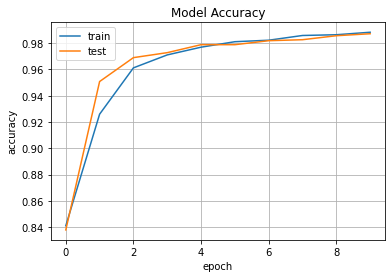

In [21]:
# Model Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.grid()
# plt.savefig('Model-Accuracy-Updated.png')

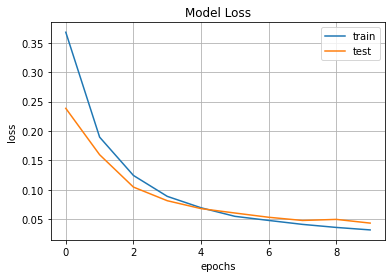

In [22]:
# Model Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Model Loss')
plt.legend(['train','test'])
plt.grid()
# plt.savefig('Model-Loss-Updated.png')

In [39]:
#Now we predict the value for X_test_pca.
y_predicted = model.predict(x_test_pca, batch_size = 20)
y_pred_bool = np.argmax(y_predicted, axis=1)

In [41]:
print(classification_report(y_test,y_pred_bool))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1113
           1       0.95      0.88      0.91       207

    accuracy                           0.97      1320
   macro avg       0.97      0.94      0.95      1320
weighted avg       0.97      0.97      0.97      1320

